In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm 
import matplotlib.mlab as mlab

from sklearn.linear_model import  LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from xgboost import XGBRegressor


from sklearn.metrics import confusion_matrix,accuracy_score,classification_report,r2_score

import scipy.stats as st
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler

In [2]:
df = pd.read_csv("CarPrice_Assignment .csv.zip")
df .head()                
                 


,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [3]:
df.shape

(205, 26)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [5]:
df.iloc[:,2].value_counts()

toyota corona           6
toyota corolla          6
peugeot 504             6
subaru dl               4
mitsubishi mirage g4    3
                       ..
mazda glc 4             1
mazda rx2 coupe         1
maxda glc deluxe        1
maxda rx3               1
volvo 246               1
Name: CarName, Length: 147, dtype: int64

In [6]:
df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

# EDA

In [7]:
Companyname = df['CarName'].apply(lambda x : x.split(" ")[0])
df.insert(3,'Companyname',Companyname)
df.drop(['CarName'],axis = 1,inplace = True)
df.head()

,car_ID,symboling,Companyname,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [8]:
df.Companyname.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   Companyname       205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [10]:
df.Companyname = df.Companyname.str.lower()
def replace_name(a,b):
  df.Companyname.replace(a,b,inplace = True)

replace_name('alfa-romero','alfa-romeo')
replace_name('maxda','mazda')
replace_name('porcshce','porsche')
replace_name('toyouta','toyota')
replace_name('vokswagen','volkswagen')
replace_name('vw','volkswagen')

df.Companyname.unique()

array(['alfa-romeo', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

# Feature engineering

In [11]:
# Derive New field - Fuel economy

df['fueleconomy'] = (0.60 * df['citympg']) + (0.40 * df['highwaympg'])
df.drop(['citympg','highwaympg'],axis = 1,inplace = True)

In [12]:
df.price.dtype

dtype('float64')

In [13]:
df['price'] = df.price.astype('int64')

In [14]:
df.price.dtype

dtype('int64')

In [15]:
temp = df.copy()
table =  temp.groupby(['Companyname'])['price'].mean()
temp = temp.merge(table.reset_index(), on = 'Companyname', how = 'left')
temp.head()

,car_ID,symboling,Companyname,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,price_x,fueleconomy,price_y
0,1,3,alfa-romeo,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,13495,23.4,15498.333333
1,2,3,alfa-romeo,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,16500,23.4,15498.333333
2,3,1,alfa-romeo,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,16500,21.8,15498.333333
3,4,2,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,13950,26.4,17859.142857
4,5,2,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,17450,19.6,17859.142857


In [16]:
bins = [0,10000,20000,40000]
car_bin = ['Budget','Medium','Highend']
df['carsrange'] = pd.cut(temp['price_y'],bins, right=False, labels = car_bin)
df

,car_ID,symboling,Companyname,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,price,fueleconomy,carsrange
0,1,3,alfa-romeo,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,13495,23.4,Medium
1,2,3,alfa-romeo,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,16500,23.4,Medium
2,3,1,alfa-romeo,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,16500,21.8,Medium
3,4,2,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,13950,26.4,Medium
4,5,2,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,17450,19.6,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,16845,25.0,Medium
201,202,-1,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19045,21.4,Medium
202,203,-1,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,21485,20.0,Medium
203,204,-1,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,22470,26.4,Medium


In [17]:
cor = df.corr()

# Visualization

<Axes: >

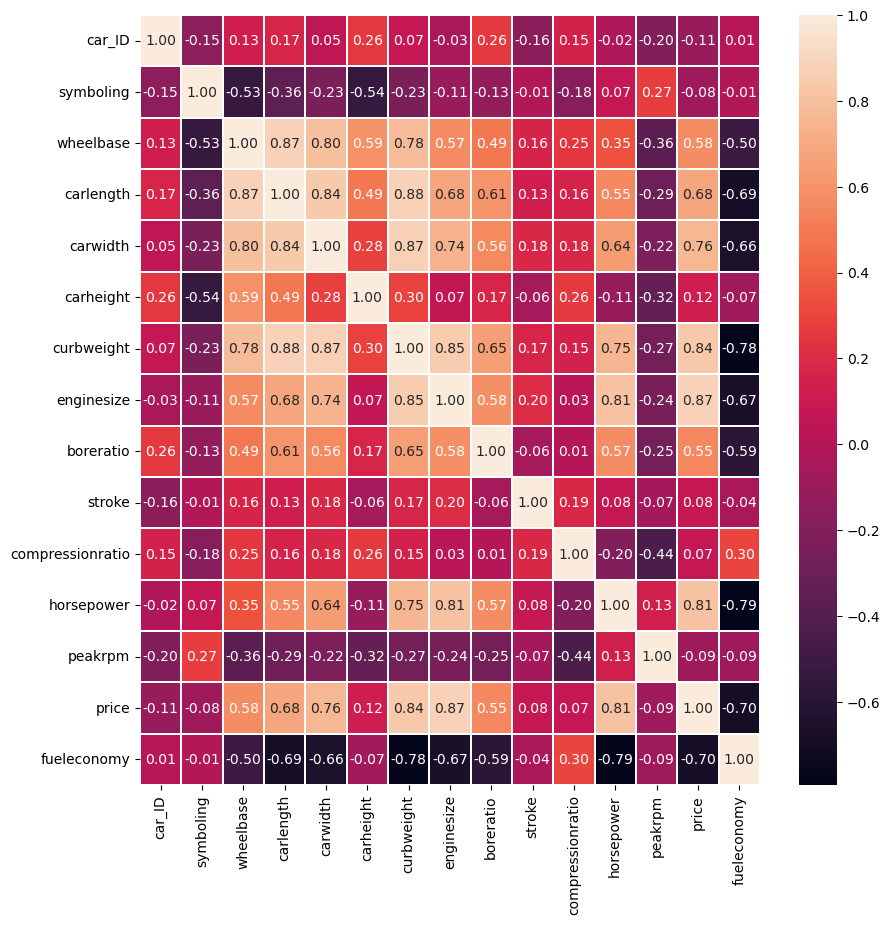

In [18]:
plt.figure(figsize=(10,10))
sns.heatmap(cor,annot=True, fmt = '.2f', linewidths=0.2)

<Axes: xlabel='carsrange', ylabel='fueleconomy'>

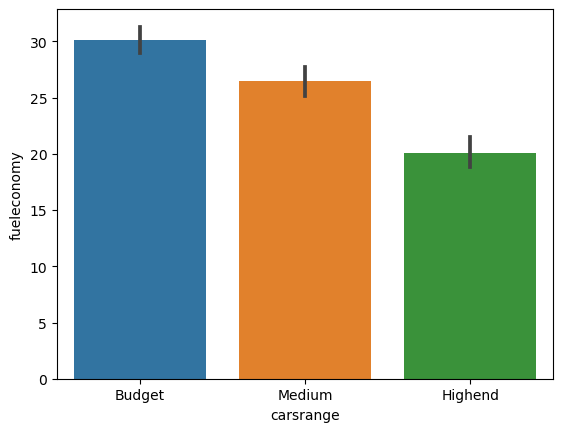

In [19]:
sns.barplot(data = df,y ='fueleconomy' ,x='carsrange')

In [20]:
list_categorical=[]

for item in df.columns:
    if(df[item].dtype=="object"):
        list_categorical.append(item)
        
print(list_categorical)

['Companyname', 'fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem']


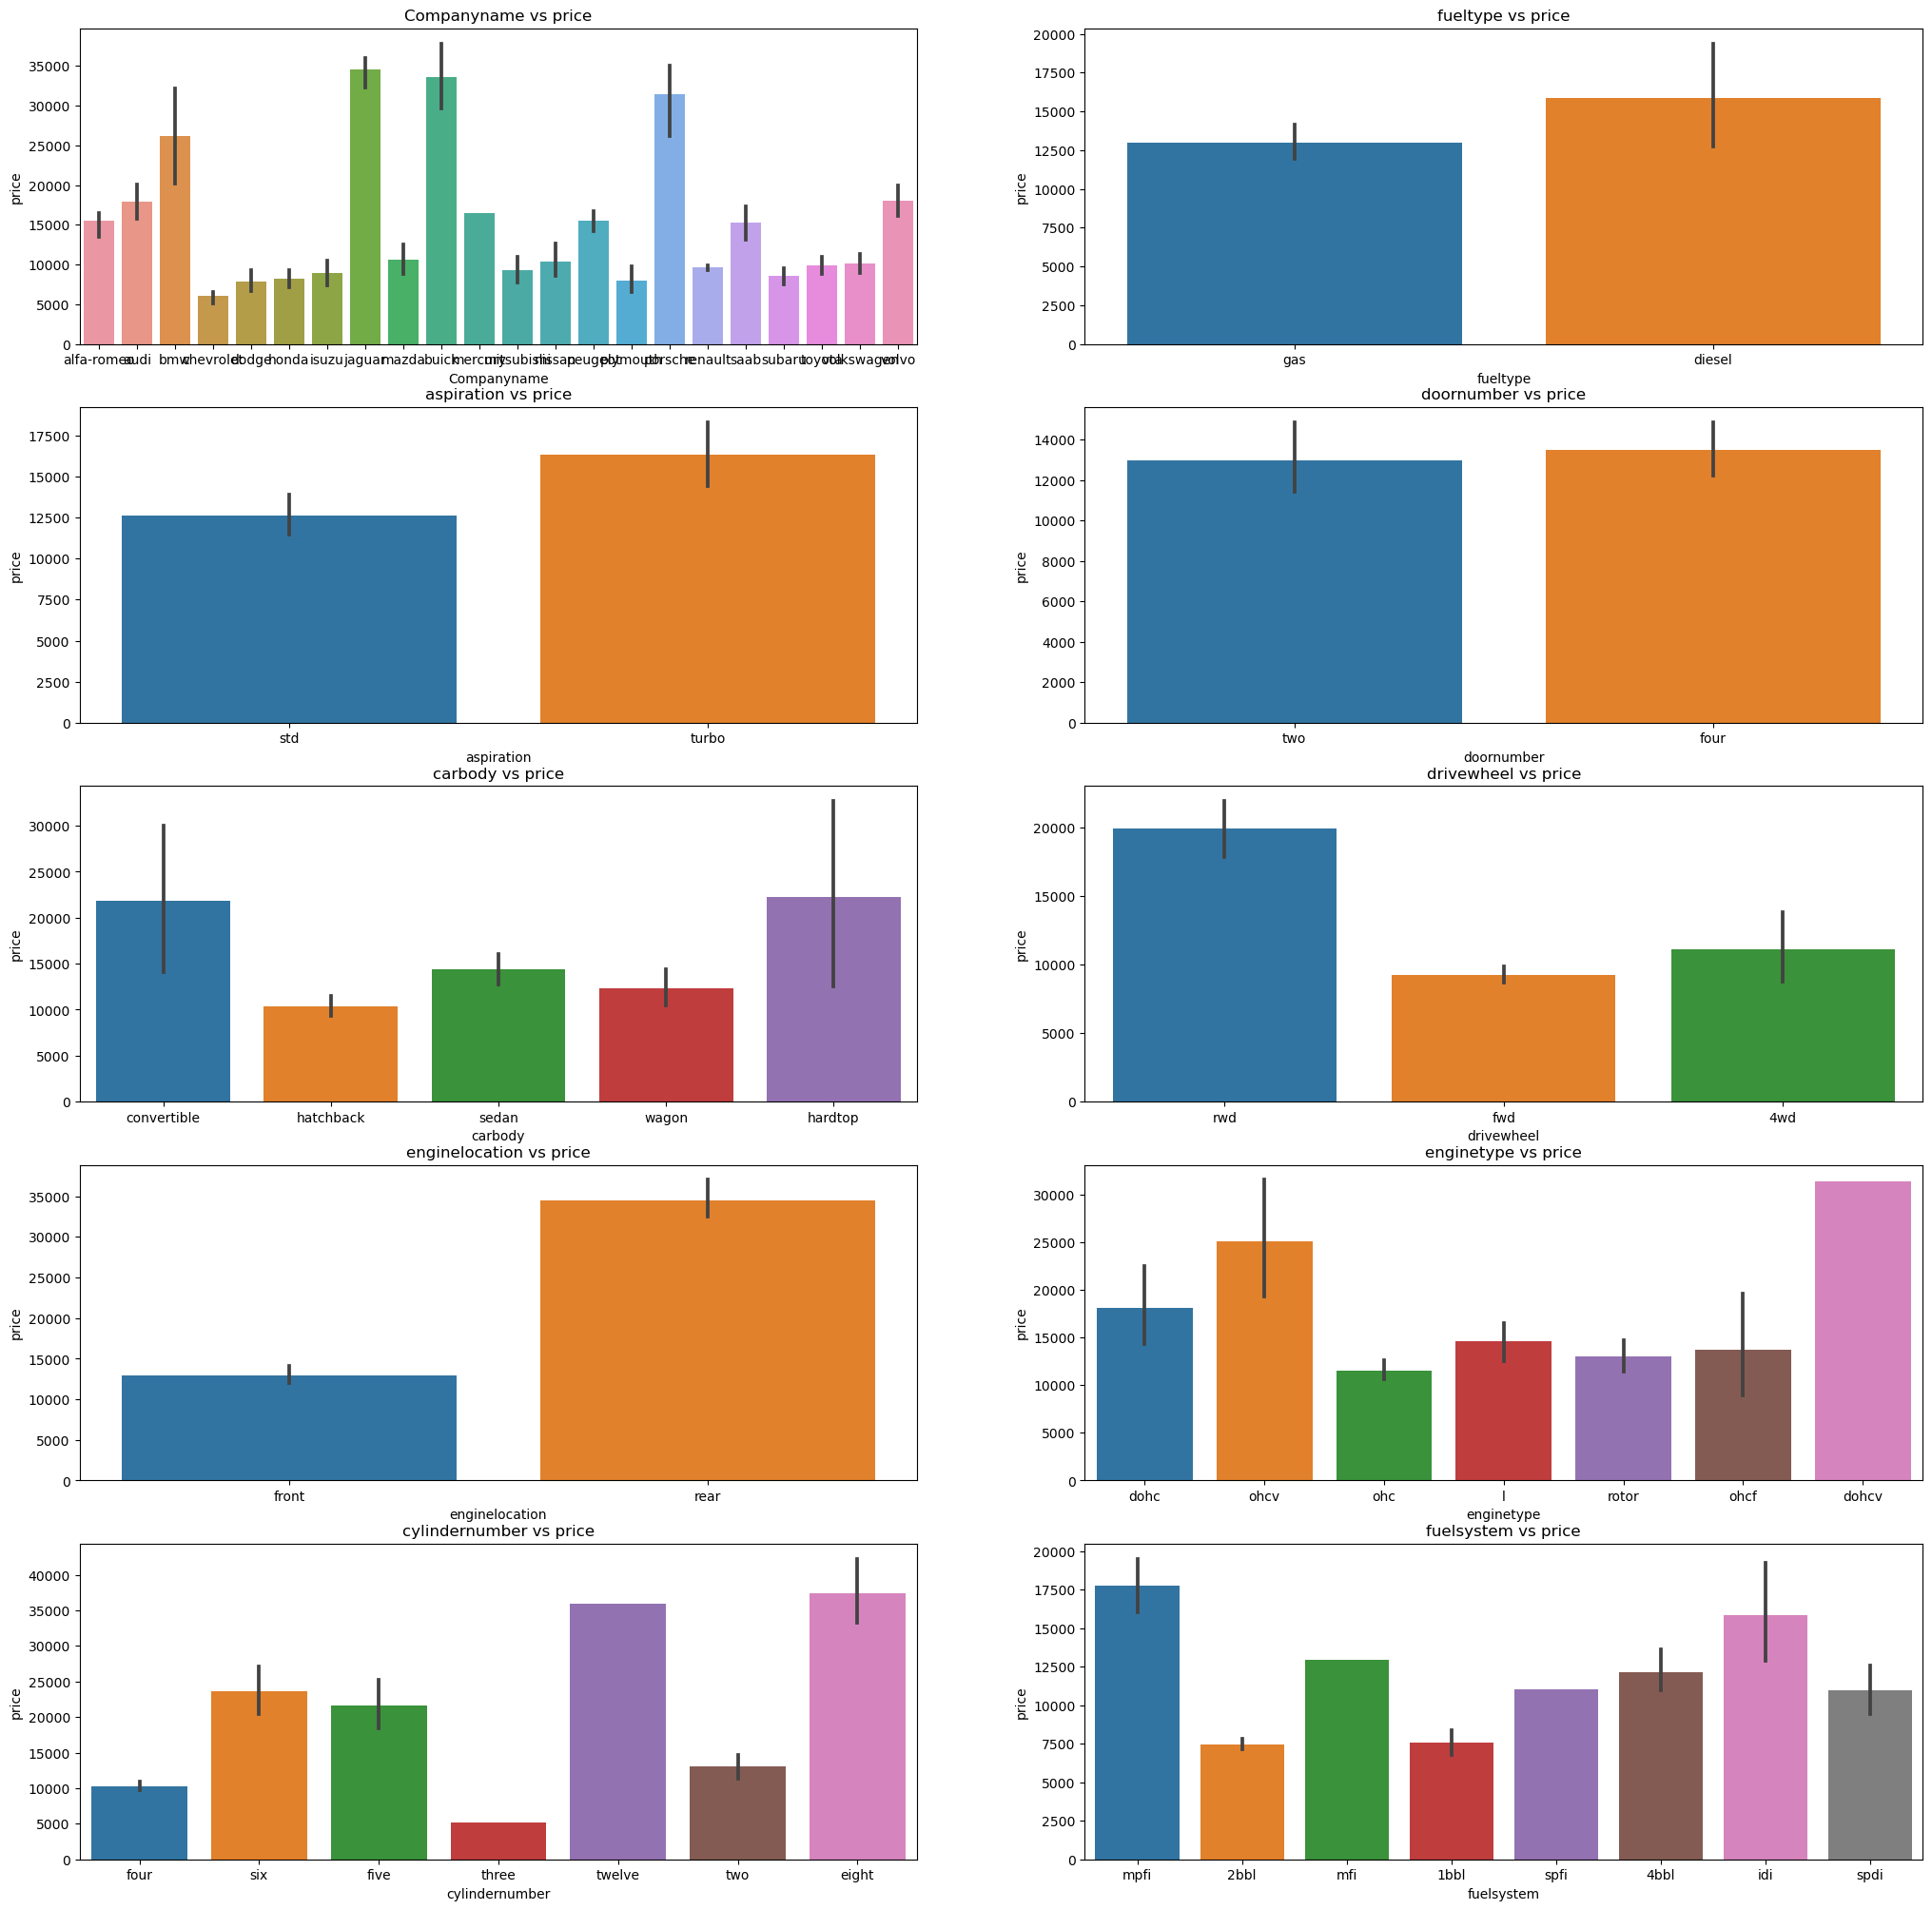

In [21]:
plt.figure(figsize=(25,25))
for i,item in enumerate(list_categorical):
  plt.subplot(5,2,i+1)
  sns.barplot(data=df,x=df[item],y=df["price"])
  plt.title("{} vs price".format(item))


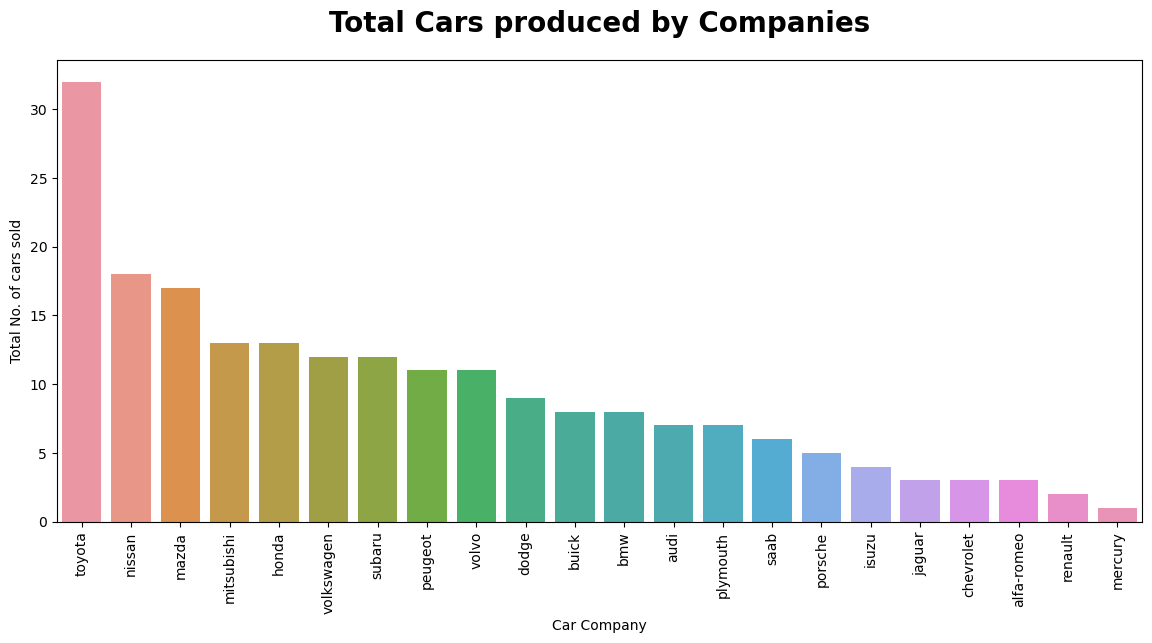

In [22]:
counts=df["Companyname"].value_counts()
plt.figure(figsize=(14,6))
counts = df["Companyname"].value_counts()
sns.barplot(x=counts.index, y=counts.values)
plt.xlabel("Car Company")
plt.ylabel("Total No. of cars sold")
plt.title("Total Cars produced by Companies", fontweight="black", fontsize=20 ,pad=20)
plt.xticks(rotation=90)
plt.show()

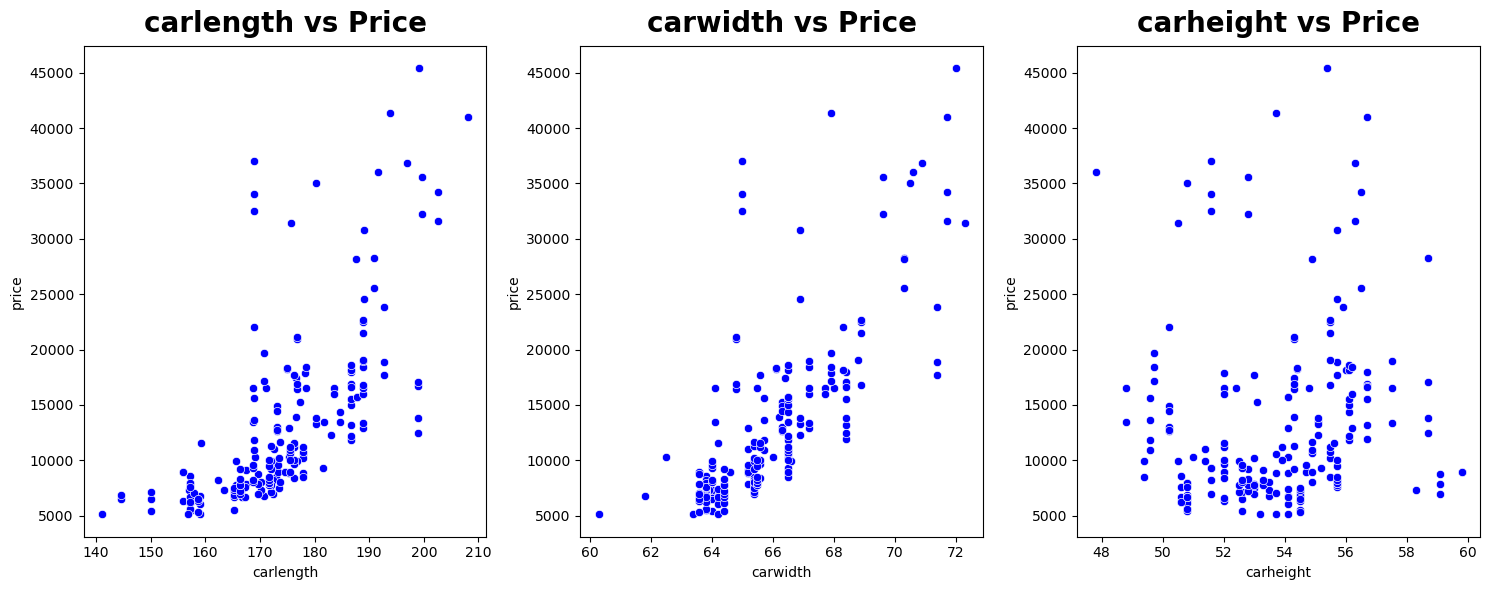

In [23]:
def scatter_plot(cols):
    x=1
    plt.figure(figsize=(15,6))
    for col in cols:
        plt.subplot(1,3,x)
        sns.scatterplot(data=df,x=col,y="price",color="blue")
        plt.title(f"{col} vs Price",fontweight="black",fontsize=20,pad=10)
        plt.tight_layout()
        x+=1
        
scatter_plot(["carlength","carwidth","carheight"])


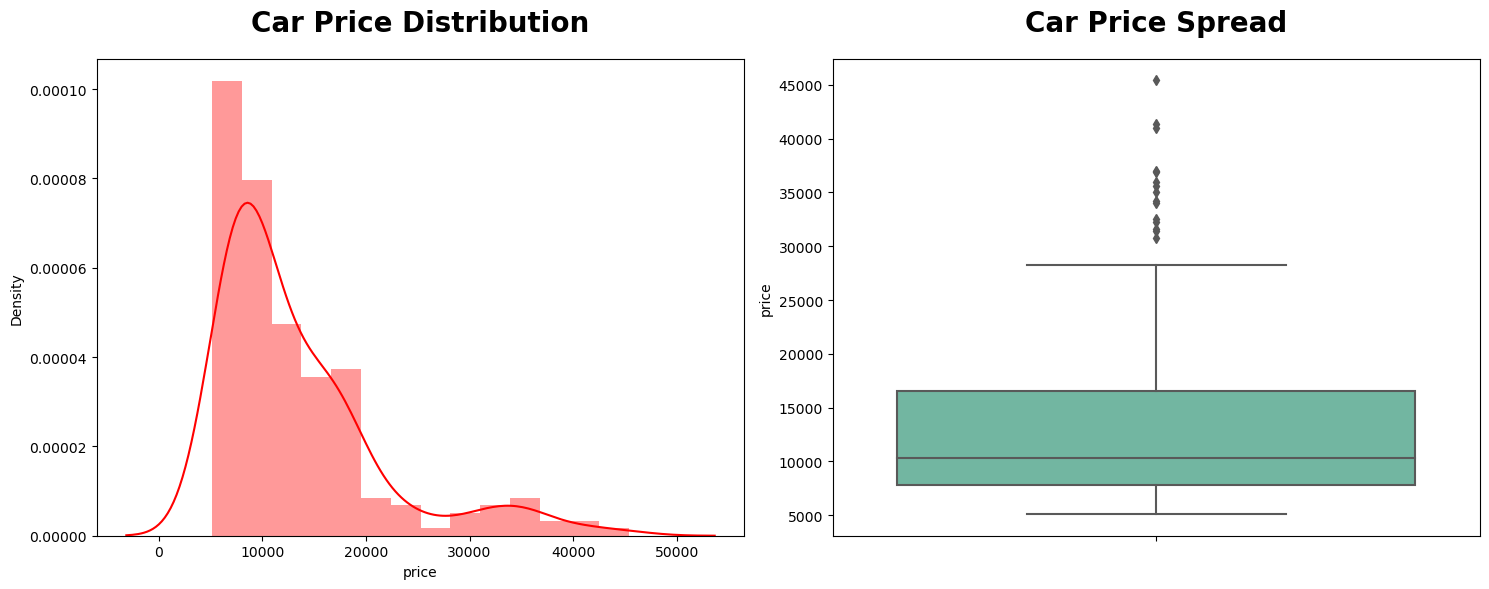

In [24]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.distplot(df["price"],color="red",kde=True)
plt.title("Car Price Distribution",fontweight="black",pad=20,fontsize=20)

plt.subplot(1,2,2)
sns.boxplot(y=df["price"],palette="Set2")
plt.title("Car Price Spread",fontweight="black",pad=20,fontsize=20)
plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Car Company vs Price')

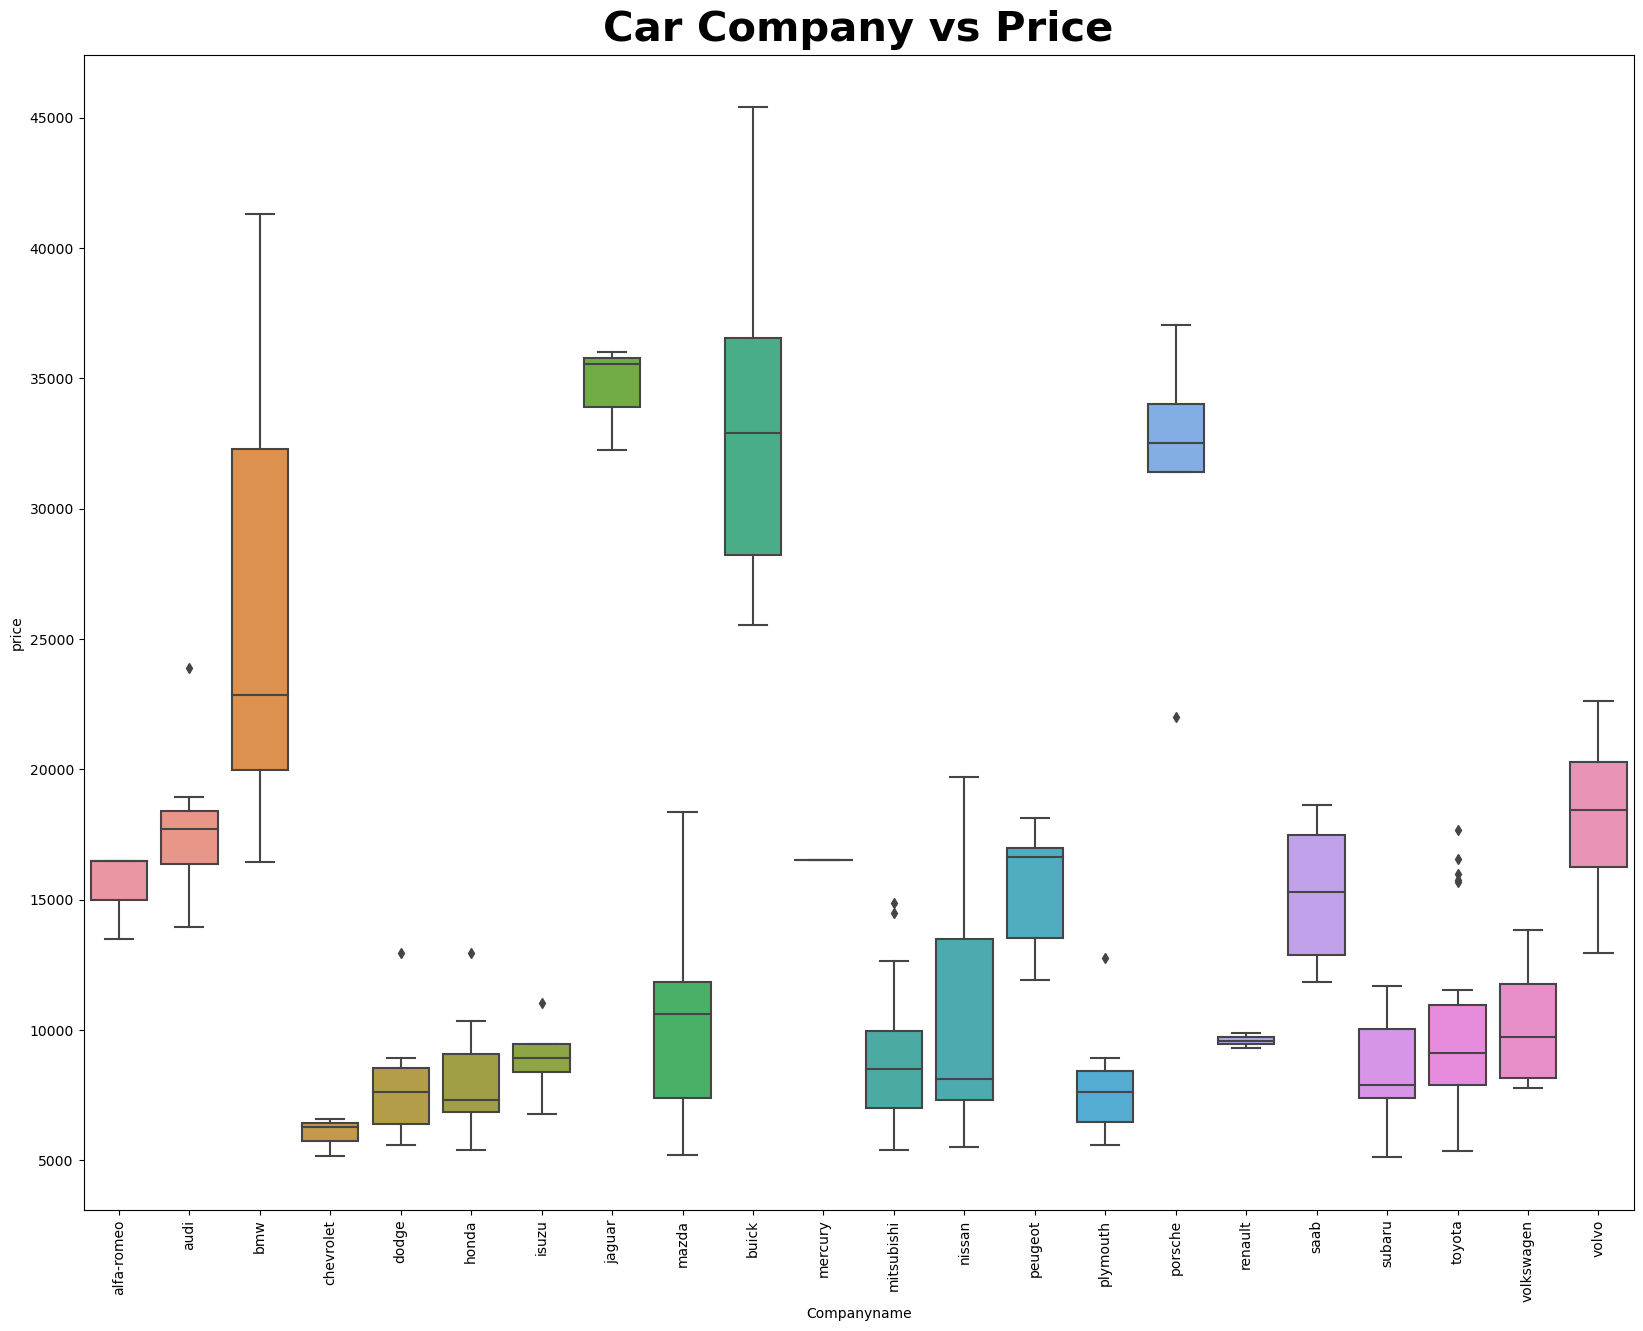

In [25]:
plt.figure(figsize=(20,15))


sns.boxplot(x="Companyname",y="price",data=df)
plt.xticks(rotation=90)
plt.title("Car Company vs Price", pad=10, fontweight="black", fontsize=30)

In [26]:
temp.head()

,car_ID,symboling,Companyname,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,price_x,fueleconomy,price_y
0,1,3,alfa-romeo,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,13495,23.4,15498.333333
1,2,3,alfa-romeo,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,16500,23.4,15498.333333
2,3,1,alfa-romeo,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,16500,21.8,15498.333333
3,4,2,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,13950,26.4,17859.142857
4,5,2,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,17450,19.6,17859.142857


# Creating Dummy Columns & Scaling

In [27]:

def dummies(x,df):
    temp = pd.get_dummies( df[x], drop_first = True)
    df = pd.concat([df, temp], axis = 1)
    df.drop([x], axis = 1, inplace = True)
    return df

# Applying the function to the cars_lr

cars_lr = df
cars_lr = dummies('fueltype',cars_lr)
cars_lr = dummies('aspiration',cars_lr)
cars_lr = dummies('carbody',cars_lr)
cars_lr = dummies('drivewheel',cars_lr)
cars_lr = dummies('enginetype',cars_lr)
cars_lr = dummies('cylindernumber',cars_lr)
cars_lr = dummies('carsrange',cars_lr)
cars_lr = dummies('Companyname',cars_lr)
cars_lr = dummies('doornumber',cars_lr)
cars_lr = dummies('enginelocation',cars_lr)
cars_lr = dummies('fuelsystem',cars_lr)

In [28]:
cars_lr.head()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,...,volvo,two,rear,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi
0,1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,...,0,1,0,0,0,0,0,1,0,0
1,2,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,...,0,1,0,0,0,0,0,1,0,0
2,3,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,...,0,1,0,0,0,0,0,1,0,0
3,4,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,...,0,0,0,0,0,0,0,1,0,0
4,5,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,...,0,0,0,0,0,0,0,1,0,0


In [29]:
cars_lr.drop('two',axis = 1,inplace=True)

In [30]:
cars_lr.shape

(205, 65)

In [31]:
scaler = StandardScaler()
num_cols = ['wheelbase','carlength','carwidth','curbweight','enginesize','boreratio','horsepower']
cars_lr[num_cols] = scaler.fit_transform(cars_lr[num_cols])
cars_lr.head()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,...,volkswagen,volvo,rear,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi
0,1,3,-1.690772,-0.426521,-0.844782,48.8,-0.014566,0.074449,0.519071,2.68,...,0,0,0,0,0,0,0,1,0,0
1,2,3,-1.690772,-0.426521,-0.844782,48.8,-0.014566,0.074449,0.519071,2.68,...,0,0,0,0,0,0,0,1,0,0
2,3,1,-0.708596,-0.231513,-0.190566,52.4,0.514882,0.604046,-2.404880,3.47,...,0,0,0,0,0,0,0,1,0,0
3,4,2,0.173698,0.207256,0.136542,54.3,-0.420797,-0.431076,-0.517266,3.40,...,0,0,0,0,0,0,0,1,0,0
4,5,2,0.107110,0.207256,0.230001,54.3,0.516807,0.218885,-0.517266,3.40,...,0,0,0,0,0,0,0,1,0,0


#Train & Test Split

In [32]:
x = cars_lr.drop(columns=["price"])
y = cars_lr["price"]

In [33]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=16)

In [34]:
x_train.shape

(143, 64)

In [35]:
y_train.shape

(143,)

In [36]:
x_test.shape

(62, 64)

In [37]:
y_test.shape

(62,)

#Model Creation

In [38]:
training_score = []
testing_score = []




In [39]:
def model_pred(model):

    model.fit(x_train,y_train)
    y_pred=model.predict(x_train)
    y_pred_test=model.predict(x_test)
    
    a = r2_score(y_train,y_pred)*100
    b = r2_score(y_test,y_pred_test)*100

    training_score.append(a)
    testing_score.append(b)

 


    print(f"r2_Score of {model} model on Training Data is:",a)
    print(f"r2_Score of {model} model on Testing Data is:",b)
    
  


In [40]:
model_pred(LinearRegression())

r2_Score of LinearRegression() model on Training Data is: 97.07415185329758
r2_Score of LinearRegression() model on Testing Data is: 80.3679932138251


In [41]:
model_pred(DecisionTreeRegressor())


r2_Score of DecisionTreeRegressor() model on Training Data is: 100.0
r2_Score of DecisionTreeRegressor() model on Testing Data is: 92.07295973426507


In [42]:
model_pred(RandomForestRegressor())

r2_Score of RandomForestRegressor() model on Training Data is: 98.71233034218763
r2_Score of RandomForestRegressor() model on Testing Data is: 96.20021439928557


In [43]:
model_pred(AdaBoostRegressor())

r2_Score of AdaBoostRegressor() model on Training Data is: 95.00335718774619
r2_Score of AdaBoostRegressor() model on Testing Data is: 93.37573417518341


In [44]:
model_pred(GradientBoostingRegressor())

r2_Score of GradientBoostingRegressor() model on Training Data is: 99.58533477517966
r2_Score of GradientBoostingRegressor() model on Testing Data is: 91.91466776341512


In [45]:
model_pred(XGBRegressor())

r2_Score of XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...) model on Training Data is: 99.99998211988945
r2_Score of XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
      

In [46]:
Algo = ["Linear Regression","Decision Tree","Random Forest","Ada Boost","Gradient Boost","XGBoost"]

In [47]:
df = pd.DataFrame({"Algorithms":Algo,"Training Score":training_score,"Testing Score":testing_score})
df

,Algorithms,Training Score,Testing Score
0,Linear Regression,97.074152,80.367993
1,Decision Tree,100.000000,92.072960
2,Random Forest,98.712330,96.200214
3,Ada Boost,95.003357,93.375734
4,Gradient Boost,99.585335,91.914668
5,XGBoost,99.999982,94.716173


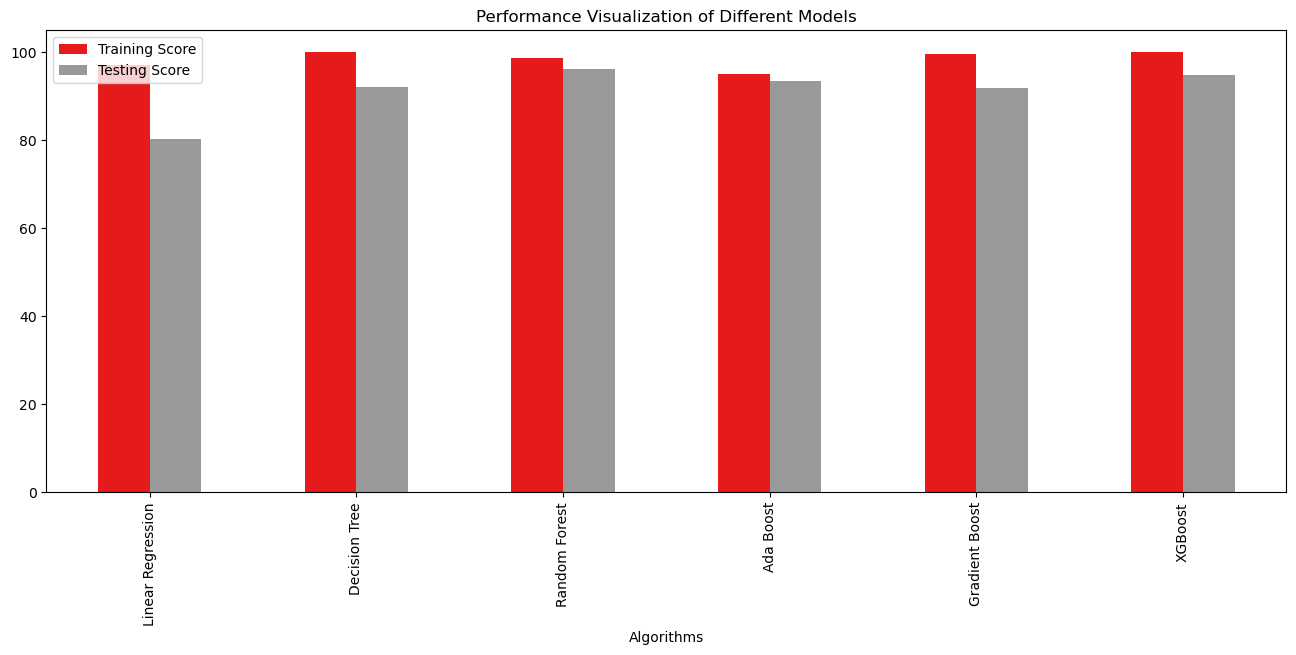

In [50]:
df.plot(x="Algorithms",y=["Training Score","Testing Score"], figsize=(16,6),kind='bar',title="Performance Visualization of Different Models",colormap="Set1")
plt.show()